# Project 1
Author: Regina Fennessy

----------------------------------------------------------------------------------


## Introduction

In this project I will use a real world phenomenon data set with four different variables I will investigate the variables,their likely distribution and their relationship to each other.<br>
The data set that I have choosen is in relation to the Titanic. The variables that I'm going to investigate are as follows:<br>
1.Survived<br>
2.Class<br>
3.Sex<br>
4.Age<br>
5.Fares

-------------------------------------------------------------------------------------

## Importing Libraries

In [225]:
# Importing numpy and renaming it 
import numpy as np

In [226]:
# Importing pandas and renaming it 
import pandas as pd

In [227]:
# Importing seaborn and renaming it
import seaborn as sns

In [228]:
# Importing matplotlib and renaming it
import matplotlib.pyplot as plt

In [229]:
# Importing statistics and renaming it
import statistics as sts

In [230]:
import scipy.special as sps

In [231]:
import sklearn.neighbors as nei

In [232]:
from random import randrange, choice

In [233]:
from sklearn.datasets import make_classification

In [234]:
from sklearn.neighbors import NearestNeighbors

In [235]:
from sklearn.neighbors import KernelDensity

In [236]:
from sklearn.model_selection import GridSearchCV

In [237]:
rand_state = 1

--------------------------------------------------------------------------------------------------------------

## Data Set and Data Cleaning

![Titanic](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/300px-RMS_Titanic_3.jpg)

In [238]:
# Reading in csv file
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


I'm droppping the columns that is not required here and also cleaning up the data where information is missing

In [239]:
# Dropping columns
df = df.drop(['Cabin','Embarked','Parch','Ticket','Name','PassengerId'], axis=1)

In [240]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,1,53.1000
4,0,3,male,35.0,0,8.0500


In [241]:
df.shape


(891, 6)

In [242]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Fare        float64
dtype: object

In [243]:
#Replacing missing Age from dataset with their respective modes 
print(df.isnull().values.any())
print(df.shape)
modes={}
for eachcol in df.columns:
    mode_col= df[eachcol].mode()[0] #Gets mode of each column
    modes[eachcol]= mode_col #storing mode of each feature in dictionary
    
    df[eachcol] = df[eachcol].replace(np.nan, mode_col)
print(df.isnull().values.any())
print(df.shape)

True
(891, 6)
False
(891, 6)


In [244]:
df

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,1,53.1000
4,0,3,male,35.0,0,8.0500
...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000
887,1,1,female,19.0,0,30.0000
888,0,3,female,24.0,1,23.4500
889,1,1,male,26.0,0,30.0000


## Investigating relationships between Age and Sex

Note: Their is significantly more male as to female on this ship and this is mainly because of the crew that worked on the ship was male

In [245]:
# Counting Males V Female
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Female Age')

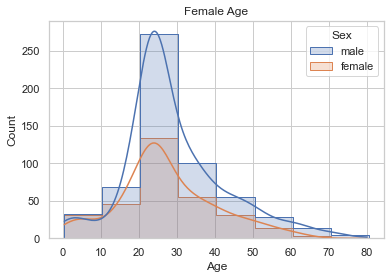

In [246]:
#Plots age by Male/Female with bins of 10
sns.histplot(df, x="Age", hue="Sex", element="step", binwidth=10, kde= True)
plt.title("Female Age")

In [247]:
Male = df.loc [df ["Sex"] == "male"]
Female = df.loc [df ["Sex"] == "female"]

The age between 20 to 30 has the highest amount of people and this was mainly because of the working age of the crew.

Text(0.5, 1.0, 'Age')

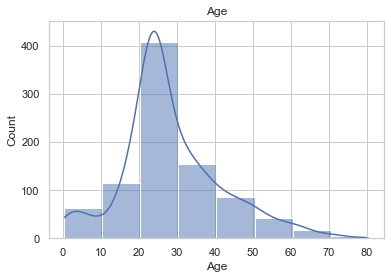

In [248]:
#Plots age 
sns.histplot(df['Age'], binwidth=10, kde= True)
plt.title("Age")

Text(0.5, 1.0, 'Male Age')

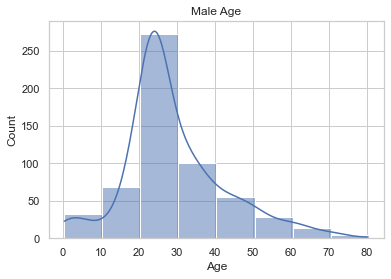

In [249]:
#Plots age by Male with bins of 10
sns.histplot(data = Male,x = "Age", binwidth=10, kde= True)
plt.title("Male Age")

Text(0.5, 1.0, 'Female Age')

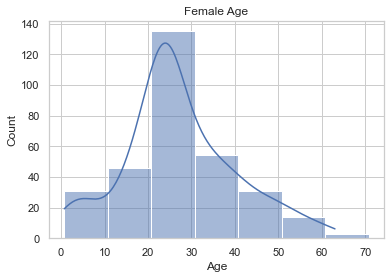

In [250]:
#Plots age by Male with bins of 10
sns.histplot(data = Female,x = "Age", binwidth=10, kde= True)
plt.title("Female Age")

## Correlations between age/sex and Survived

The below graphs shows that fewer males survived than females. This is because women and children were first to be put on the lifeboats. Here we also see that most of the men that died were in the age range of 20 to 40 but must of the women that survived were in the 20 to 45 range.

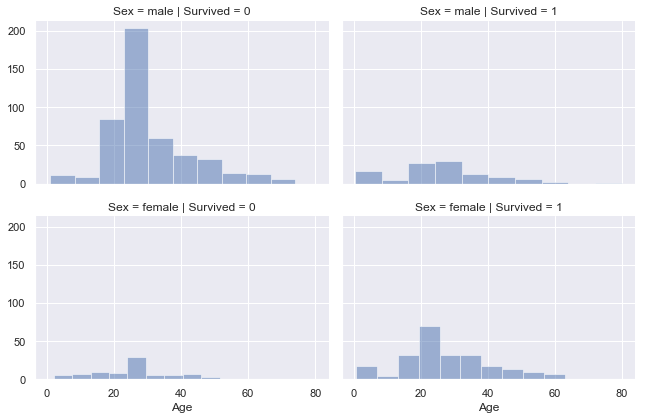

In [251]:
#setting grid style
sns.set(style="darkgrid")
#grid map
grid = sns.FacetGrid(df, col='Survived', row='Sex', height=3, aspect=1.5)
grid.map(plt.hist, 'Age', alpha=.5, bins=10)
grid.add_legend();

## Correlations between Pclass and other variables

Here we are showing the correlations between Pclass and Age/Fare/Survived/Sex. 

In the first plot we can see that the majority of the age range 20 to 30 area in Pclass 3 with were made up mainly of the crew.

The second plot shows that Pclass 1 and 2 are similar in the fare cost.

The third plot shows that Pclass 2 were most of the survivors.

The fourth plot shows that most of the Pclass 3 were made up of males and Pclass 2 were mostly female



<AxesSubplot:xlabel='Sex', ylabel='Count'>

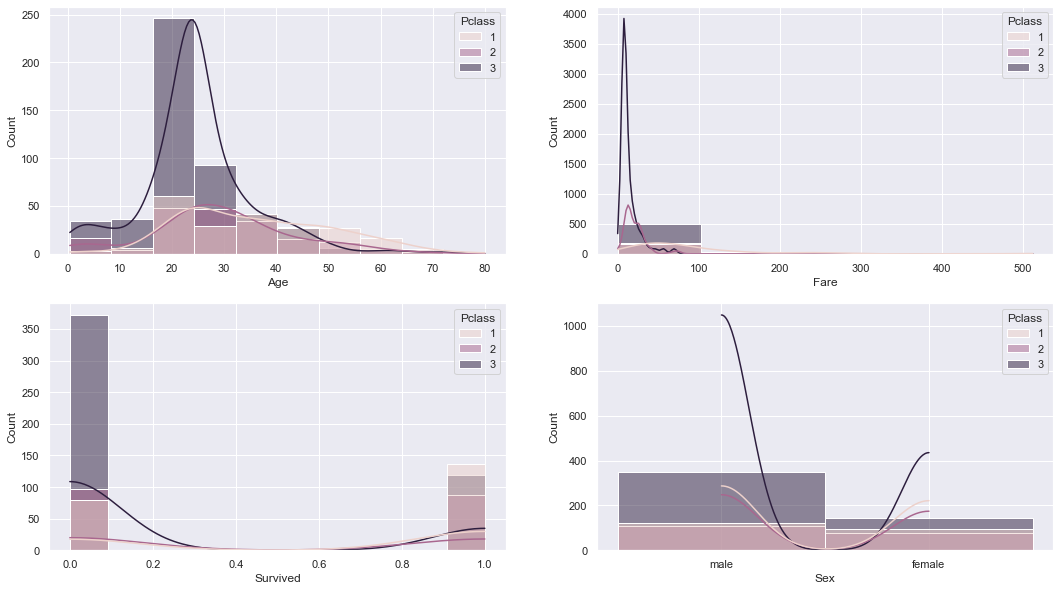

In [252]:
fig, axes  = plt.subplots(2, 2, figsize=(18, 10))
sns.histplot(ax=axes[0, 0],data= df, x = "Age", hue = "Pclass", bins = 10, kde = True)
sns.histplot(ax=axes[0, 1],data= df, x = "Fare", hue = "Pclass", bins = 5, kde = True)
sns.histplot(ax=axes[1, 0],data= df, x = "Survived", hue = "Pclass",  kde = True)
sns.histplot(ax=axes[1, 1],data= df, x = "Sex", hue = "Pclass", bins = 2, kde = True)

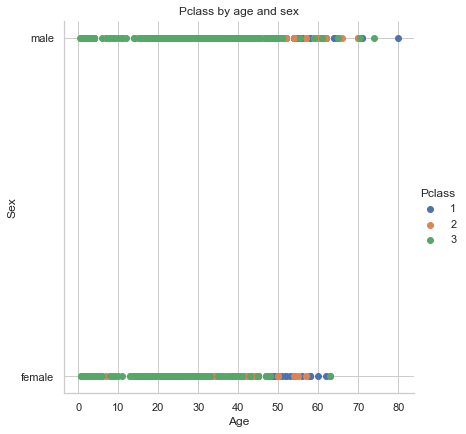

In [253]:
#Creating a scatter Plot
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="Pclass", height=6) \
.map(plt.scatter, "Age", "Sex" ) \
.add_legend()  
plt.title("Pclass by age and sex")  
plt.show() 


Text(0.5, 0, 'Fare (in Dollars)')

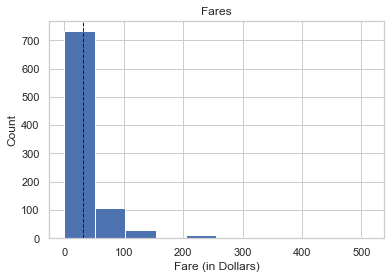

In [254]:
plt.hist(df.Fare)
plt.axvline(df.Fare.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Fares')
plt.ylabel('Count')
plt.xlabel('Fare (in Dollars)')

C:\Users\g025067\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


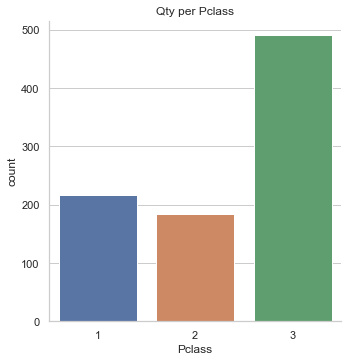

In [255]:
sns.catplot('Pclass',data=df,kind='count')
plt.title("Qty per Pclass")
plt.show()

## Synthesing the Data

In [256]:
Male = df.loc [df ["Sex"] == "male"]
Female = df.loc [df ["Sex"] == "female"]

In [257]:
Male = Male.drop(["Sex","SibSp"], axis = 1)

In [258]:
X= Male

#  Using GridSearchCV to determine the best parameter for bandwidth
bandwidth_params = {'bandwidth': np.arange(0.5,1,0.05)}
grid_search = GridSearchCV(KernelDensity(), bandwidth_params)
grid_search.fit(X)
kde = grid_search.best_estimator_

# Generate/sample 100 new rows from this dataset
sd_male = kde.sample(100, random_state=rand_state)

In [259]:
df_sd_male = pd.DataFrame(sd_male, columns=["Survived","Pclass","Age","Fare"])
#df_sd_male["Species"] = "Pclass"
df_sd_male["Sex"] = "male"
df_sd_male.head()

,Survived,Pclass,Age,Fare,Sex
0,0.299853,1.078909,23.709106,8.515776,male
1,0.218590,2.723911,22.788788,12.809280,male
2,0.177233,3.389549,22.188385,7.363058,male
3,-0.637129,1.358686,24.115730,32.073010,male
4,1.138972,2.175899,24.643479,12.393206,male


Text(0.5, 1.0, 'Male Age')

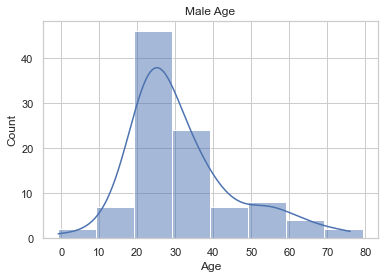

In [260]:
#Plots age 
sns.histplot(df_sd_male['Age'], binwidth=10, kde= True)
plt.title("Male Age")

In [261]:
Female = Female.drop(["Sex","SibSp"], axis = 1)

In [262]:
X= Female

# Fit a kernel density model using GridSearchCV to determine the best parameter for bandwidth
bandwidth_params = {'bandwidth': np.arange(0.5,1,0.05)}
grid_search = GridSearchCV(KernelDensity(), bandwidth_params)
grid_search.fit(X)
kde = grid_search.best_estimator_

# Generate/sample 100 new rows from this dataset
sd_ale = kde.sample(100, random_state=rand_state)

In [263]:
df_sd_female = pd.DataFrame(sd_female, columns=["Survived","Pclass","Age","Fare"])
df_sd_female["Sex"] = "female"
df_sd_female.head()

,Survived,Pclass,Age,Fare,Sex
0,-0.008572,2.349740,15.547596,8.522095,female
1,0.179815,0.875986,57.503067,26.311287,female
2,2.226711,2.084005,1.068172,15.999726,female
3,1.815734,1.799130,25.059127,15.913038,female
4,1.830559,3.068069,22.442901,15.485063,female


Text(0.5, 1.0, 'Female Age')

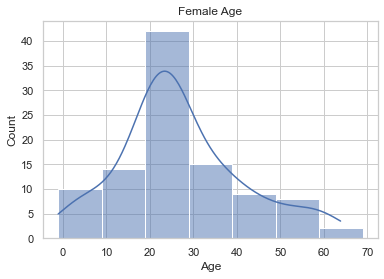

In [264]:
#Plots age 
sns.histplot(df_sd_female['Age'], binwidth=10, kde= True)
plt.title("Female Age")

In [265]:
new_data = df.loc[[df]]

ValueError: Buffer has wrong number of dimensions (expected 1, got 3)

In [ ]:
df_new = df.drop(["SibSp","Sex"], axis = 1)

In [ ]:
# Fit a kernel density model using GridSearchCV to determine the best parameter for bandwidth
bandwidth_params = {'bandwidth': np.arange(0.5,1,0.05)}
grid_search = GridSearchCV(KernelDensity(), bandwidth_params)
grid_search.fit(df_new)
kde = grid_search.best_estimator_

# Creating 100 new rows of data
new_data = kde.sample(100, random_state=rand_state)

In [ ]:
df_sd_data = pd.DataFrame(new_data, columns=["Survived","Pclass","Age","Fare"])

df_sd_data.head()

## References

https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

https://seaborn.pydata.org/generated/seaborn.histplot.html

https://www.codingninjas.com/codestudio/library/intro-to-titanic-dataset-and-data-analysis

https://en.wikipedia.org/wiki/Titanic

https://www.britannica.com/topic/Titanic

http://www.icyousee.org/titanic.html

https://matplotlib.org/stable/gallery/subplots_axes_and_figures/figure_size_units.html
  
  
  
  

  